In [1]:
import time
import torch
import sbi.utils as utils
from sbi.inference.base import infer
from sbi.analysis.plot import pairplot
import numpy as np
import pyross
from matplotlib import pyplot as plt
from memilio.epidata import getCaseData, getPopulationData
from memiliflow.data.case_data import CaseData
from datetime import date
import pandas as pd

/p/project/atmlaml/bazarova1/memiliflow/sc_venv_template/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#  CaseData.download_to_filesystem(
#          data_dir='/home/bazarova1/',
#          moving_average=7,
#          start_date=date.fromisoformat('2020-03-01'),
#          end_date=date.fromisoformat('2020-05-31'),
#          file_format='json_timeasstring',
#      )
#casedata=CaseData({"cases": pd.DataFrame.from_dict(data=simulated_data)})
#casedata.to_oseir_compartments(time_exposed=5,time_infected=10)

data={"Date":"2020-03-01","Confirmed":1902.4285714286,"Deaths":43.0,"Recovered":1859.4285714286},{"Date":"2020-03-02","Confirmed":2206.5714285714,"Deaths":50.1428571429,"Recovered":2156.4285714286},{"Date":"2020-03-03","Confirmed":2575.8571428571,"Deaths":59.4285714286,"Recovered":2516.4285714286},{"Date":"2020-03-04","Confirmed":3034.7142857143,"Deaths":71.5714285714,"Recovered":2963.1428571429},{"Date":"2020-03-05","Confirmed":3619.0,"Deaths":86.2857142857,"Recovered":3532.7142857143},{"Date":"2020-03-06","Confirmed":4415.0,"Deaths":103.2857142857,"Recovered":4311.7142857143},{"Date":"2020-03-07","Confirmed":5491.0,"Deaths":123.7142857143,"Recovered":5367.2857142857},{"Date":"2020-03-08","Confirmed":6912.8571428571,"Deaths":149.5714285714,"Recovered":6763.2857142857},{"Date":"2020-03-09","Confirmed":8721.5714285714,"Deaths":182.7142857143,"Recovered":8538.8571428571},{"Date":"2020-03-10","Confirmed":10993.8571428571,"Deaths":224.4285714286,"Recovered":10769.4285714286},{"Date":"2020-03-11","Confirmed":13707.5714285714,"Deaths":271.7142857143,"Recovered":13435.8571428571},{"Date":"2020-03-12","Confirmed":16841.2857142857,"Deaths":329.7142857143,"Recovered":16511.5714285714},{"Date":"2020-03-13","Confirmed":20505.1428571429,"Deaths":403.5714285714,"Recovered":20101.5714285714},{"Date":"2020-03-14","Confirmed":24549.1428571429,"Deaths":490.7142857143,"Recovered":24058.4285714286},{"Date":"2020-03-15","Confirmed":28924.0,"Deaths":591.7142857143,"Recovered":28332.2857142857},{"Date":"2020-03-16","Confirmed":33503.2857142857,"Deaths":702.4285714286,"Recovered":32800.8571428571},{"Date":"2020-03-17","Confirmed":38265.8571428571,"Deaths":830.0,"Recovered":37435.8571428571},{"Date":"2020-03-18","Confirmed":43075.4285714286,"Deaths":969.4285714286,"Recovered":42106.0},{"Date":"2020-03-19","Confirmed":47794.4285714286,"Deaths":1113.4285714286,"Recovered":46681.0},{"Date":"2020-03-20","Confirmed":52439.8571428571,"Deaths":1274.5714285714,"Recovered":51165.2857142857},{"Date":"2020-03-21","Confirmed":56958.7142857143,"Deaths":1447.8571428571,"Recovered":55510.8571428571},{"Date":"2020-03-22","Confirmed":61394.1428571429,"Deaths":1637.2857142857,"Recovered":59756.8571428571},{"Date":"2020-03-23","Confirmed":65782.7142857143,"Deaths":1841.1428571429,"Recovered":63941.5714285714},{"Date":"2020-03-24","Confirmed":70062.2857142857,"Deaths":2053.7142857143,"Recovered":68008.5714285714},{"Date":"2020-03-25","Confirmed":74301.5714285714,"Deaths":2283.5714285714,"Recovered":72018.0},{"Date":"2020-03-26","Confirmed":78484.7142857143,"Deaths":2520.2857142857,"Recovered":75964.4285714286},{"Date":"2020-03-27","Confirmed":82580.5714285714,"Deaths":2765.2857142857,"Recovered":79815.2857142857},{"Date":"2020-03-28","Confirmed":86664.7142857143,"Deaths":3018.1428571429,"Recovered":83646.5714285714},{"Date":"2020-03-29","Confirmed":90732.2857142857,"Deaths":3278.5714285714,"Recovered":87453.7142857143},{"Date":"2020-03-30","Confirmed":94794.8571428571,"Deaths":3553.1428571429,"Recovered":91241.7142857143},{"Date":"2020-03-31","Confirmed":98846.7142857143,"Deaths":3839.8571428571,"Recovered":95006.8571428571},{"Date":"2020-04-01","Confirmed":102799.7142857143,"Deaths":4122.1428571429,"Recovered":98677.5714285714},{"Date":"2020-04-02","Confirmed":106698.2857142857,"Deaths":4408.0,"Recovered":102290.2857142857},{"Date":"2020-04-03","Confirmed":110474.4285714286,"Deaths":4691.4285714286,"Recovered":105783.0},{"Date":"2020-04-04","Confirmed":114176.8571428571,"Deaths":4974.0,"Recovered":109202.8571428571},{"Date":"2020-04-05","Confirmed":117736.4285714286,"Deaths":5251.4285714286,"Recovered":112485.0},{"Date":"2020-04-06","Confirmed":121161.0,"Deaths":5518.1428571429,"Recovered":115642.8571428571},{"Date":"2020-04-07","Confirmed":124328.4285714286,"Deaths":5764.4285714286,"Recovered":118564.0},{"Date":"2020-04-08","Confirmed":127361.8571428571,"Deaths":6001.2857142857,"Recovered":121360.5714285714},{"Date":"2020-04-09","Confirmed":130289.5714285714,"Deaths":6231.5714285714,"Recovered":124058.0},{"Date":"2020-04-10","Confirmed":132971.4285714286,"Deaths":6437.5714285714,"Recovered":126533.8571428571},{"Date":"2020-04-11","Confirmed":135455.4285714286,"Deaths":6628.2857142857,"Recovered":128827.1428571429},{"Date":"2020-04-12","Confirmed":137765.8571428571,"Deaths":6803.0,"Recovered":130962.8571428571},{"Date":"2020-04-13","Confirmed":139913.7142857143,"Deaths":6960.0,"Recovered":132953.7142857143},{"Date":"2020-04-14","Confirmed":142007.2857142857,"Deaths":7106.8571428571,"Recovered":134900.4285714286},{"Date":"2020-04-15","Confirmed":144005.5714285714,"Deaths":7244.0,"Recovered":136761.5714285714},{"Date":"2020-04-16","Confirmed":145917.4285714286,"Deaths":7373.4285714286,"Recovered":138544.0},{"Date":"2020-04-17","Confirmed":147805.8571428571,"Deaths":7502.1428571429,"Recovered":140303.7142857143},{"Date":"2020-04-18","Confirmed":149615.8571428571,"Deaths":7623.1428571429,"Recovered":141992.7142857143},{"Date":"2020-04-19","Confirmed":151349.8571428571,"Deaths":7734.2857142857,"Recovered":143615.5714285714},{"Date":"2020-04-20","Confirmed":153001.4285714286,"Deaths":7841.2857142857,"Recovered":145160.1428571429},{"Date":"2020-04-21","Confirmed":154548.2857142857,"Deaths":7939.5714285714,"Recovered":146608.7142857143},{"Date":"2020-04-22","Confirmed":156019.4285714286,"Deaths":8032.2857142857,"Recovered":147987.1428571429},{"Date":"2020-04-23","Confirmed":157418.1428571429,"Deaths":8115.5714285714,"Recovered":149302.5714285714},{"Date":"2020-04-24","Confirmed":158752.5714285714,"Deaths":8190.7142857143,"Recovered":150561.8571428571},{"Date":"2020-04-25","Confirmed":160025.1428571429,"Deaths":8260.7142857143,"Recovered":151764.4285714286},{"Date":"2020-04-26","Confirmed":161209.7142857143,"Deaths":8326.0,"Recovered":152883.7142857143},{"Date":"2020-04-27","Confirmed":162332.1428571429,"Deaths":8385.4285714286,"Recovered":153946.7142857143},{"Date":"2020-04-28","Confirmed":163370.7142857143,"Deaths":8440.4285714286,"Recovered":154930.2857142857},{"Date":"2020-04-29","Confirmed":164347.0,"Deaths":8490.1428571429,"Recovered":155856.8571428571},{"Date":"2020-04-30","Confirmed":165294.5714285714,"Deaths":8538.1428571429,"Recovered":156756.4285714286},{"Date":"2020-05-01","Confirmed":166193.4285714286,"Deaths":8582.8571428571,"Recovered":157610.5714285714},{"Date":"2020-05-02","Confirmed":167065.8571428571,"Deaths":8623.7142857143,"Recovered":158442.1428571429},{"Date":"2020-05-03","Confirmed":167913.1428571429,"Deaths":8659.5714285714,"Recovered":159253.5714285714},{"Date":"2020-05-04","Confirmed":168719.1428571429,"Deaths":8692.1428571429,"Recovered":160027.0},{"Date":"2020-05-05","Confirmed":169516.0,"Deaths":8724.2857142857,"Recovered":160791.7142857143},{"Date":"2020-05-06","Confirmed":170300.7142857143,"Deaths":8754.0,"Recovered":161546.7142857143},{"Date":"2020-05-07","Confirmed":171064.4285714286,"Deaths":8783.8571428571,"Recovered":162280.5714285714},{"Date":"2020-05-08","Confirmed":171806.7142857143,"Deaths":8810.7142857143,"Recovered":162996.0},{"Date":"2020-05-09","Confirmed":172512.5714285714,"Deaths":8834.5714285714,"Recovered":163678.0},{"Date":"2020-05-10","Confirmed":173188.8571428571,"Deaths":8858.4285714286,"Recovered":164330.4285714286},{"Date":"2020-05-11","Confirmed":173833.8571428571,"Deaths":8879.4285714286,"Recovered":164954.4285714286},{"Date":"2020-05-12","Confirmed":174469.2857142857,"Deaths":8899.8571428571,"Recovered":165569.4285714286},{"Date":"2020-05-13","Confirmed":175090.7142857143,"Deaths":8922.5714285714,"Recovered":166168.1428571429},{"Date":"2020-05-14","Confirmed":175704.7142857143,"Deaths":8943.5714285714,"Recovered":166761.1428571429},{"Date":"2020-05-15","Confirmed":176310.5714285714,"Deaths":8963.1428571429,"Recovered":167347.4285714286},{"Date":"2020-05-16","Confirmed":176900.8571428571,"Deaths":8982.0,"Recovered":167918.8571428571},{"Date":"2020-05-17","Confirmed":177491.0,"Deaths":9001.4285714286,"Recovered":168489.5714285714},{"Date":"2020-05-18","Confirmed":178049.5714285714,"Deaths":9019.4285714286,"Recovered":169030.1428571429},{"Date":"2020-05-19","Confirmed":178565.1428571429,"Deaths":9034.8571428571,"Recovered":169530.2857142857},{"Date":"2020-05-20","Confirmed":179058.5714285714,"Deaths":9048.4285714286,"Recovered":170010.1428571429},{"Date":"2020-05-21","Confirmed":179537.5714285714,"Deaths":9061.0,"Recovered":170476.5714285714},{"Date":"2020-05-22","Confirmed":179992.2857142857,"Deaths":9073.1428571429,"Recovered":170919.1428571429},{"Date":"2020-05-23","Confirmed":180451.4285714286,"Deaths":9085.5714285714,"Recovered":171365.8571428571},{"Date":"2020-05-24","Confirmed":180885.4285714286,"Deaths":9095.5714285714,"Recovered":171789.8571428571},{"Date":"2020-05-25","Confirmed":181323.5714285714,"Deaths":9106.0,"Recovered":172217.5714285714},{"Date":"2020-05-26","Confirmed":181753.8571428571,"Deaths":9115.2857142857,"Recovered":172638.5714285714},{"Date":"2020-05-27","Confirmed":182183.4285714286,"Deaths":9123.7142857143,"Recovered":173059.7142857143},{"Date":"2020-05-28","Confirmed":182602.0,"Deaths":9132.2857142857,"Recovered":173469.7142857143},{"Date":"2020-05-29","Confirmed":182989.7142857143,"Deaths":9140.4285714286,"Recovered":173849.2857142857},{"Date":"2020-05-30","Confirmed":183346.1428571429,"Deaths":9147.4285714286,"Recovered":174198.7142857143},{"Date":"2020-05-31","Confirmed":183693.1428571429,"Deaths":9153.2857142857,"Recovered":174539.8571428571}
# data={"Date":"2020-03-01","Confirmed":1902.4285714286,"Deaths":43.0,"Recovered":1859.4285714286},{"Date":"2020-03-02","Confirmed":2206.5714285714,"Deaths":50.1428571429,"Recovered":2156.4285714286},{"Date":"2020-03-03","Confirmed":2575.8571428571,"Deaths":59.4285714286,"Recovered":2516.4285714286},{"Date":"2020-03-04","Confirmed":3034.7142857143,"Deaths":71.5714285714,"Recovered":2963.1428571429},{"Date":"2020-03-05","Confirmed":3619.0,"Deaths":86.2857142857,"Recovered":3532.7142857143},{"Date":"2020-03-06","Confirmed":4415.0,"Deaths":103.2857142857,"Recovered":4311.7142857143},{"Date":"2020-03-07","Confirmed":5491.0,"Deaths":123.7142857143,"Recovered":5367.2857142857},{"Date":"2020-03-08","Confirmed":6912.8571428571,"Deaths":149.5714285714,"Recovered":6763.2857142857},{"Date":"2020-03-09","Confirmed":8721.5714285714,"Deaths":182.7142857143,"Recovered":8538.8571428571},{"Date":"2020-03-10","Confirmed":10993.8571428571,"Deaths":224.4285714286,"Recovered":10769.4285714286},{"Date":"2020-03-11","Confirmed":13707.5714285714,"Deaths":271.7142857143,"Recovered":13435.8571428571},{"Date":"2020-03-12","Confirmed":16841.2857142857,"Deaths":329.7142857143,"Recovered":16511.5714285714},{"Date":"2020-03-13","Confirmed":20505.1428571429,"Deaths":403.5714285714,"Recovered":20101.5714285714},{"Date":"2020-03-14","Confirmed":24549.1428571429,"Deaths":490.7142857143,"Recovered":24058.4285714286},{"Date":"2020-03-15","Confirmed":28924.0,"Deaths":591.7142857143,"Recovered":28332.2857142857},{"Date":"2020-03-16","Confirmed":33503.2857142857,"Deaths":702.4285714286,"Recovered":32800.8571428571},{"Date":"2020-03-17","Confirmed":38265.8571428571,"Deaths":830.0,"Recovered":37435.8571428571},{"Date":"2020-03-18","Confirmed":43075.4285714286,"Deaths":969.4285714286,"Recovered":42106.0},{"Date":"2020-03-19","Confirmed":47794.4285714286,"Deaths":1113.4285714286,"Recovered":46681.0},{"Date":"2020-03-20","Confirmed":52439.8571428571,"Deaths":1274.5714285714,"Recovered":51165.2857142857},{"Date":"2020-03-21","Confirmed":56958.7142857143,"Deaths":1447.8571428571,"Recovered":55510.8571428571},{"Date":"2020-03-22","Confirmed":61394.1428571429,"Deaths":1637.2857142857,"Recovered":59756.8571428571},{"Date":"2020-03-23","Confirmed":65782.7142857143,"Deaths":1841.1428571429,"Recovered":63941.5714285714},{"Date":"2020-03-24","Confirmed":70062.2857142857,"Deaths":2053.7142857143,"Recovered":68008.5714285714},{"Date":"2020-03-25","Confirmed":74301.5714285714,"Deaths":2283.5714285714,"Recovered":72018.0},{"Date":"2020-03-26","Confirmed":78484.7142857143,"Deaths":2520.2857142857,"Recovered":75964.4285714286},{"Date":"2020-03-27","Confirmed":82580.5714285714,"Deaths":2765.2857142857,"Recovered":79815.2857142857},{"Date":"2020-03-28","Confirmed":86664.7142857143,"Deaths":3018.1428571429,"Recovered":83646.5714285714},{"Date":"2020-03-29","Confirmed":90732.2857142857,"Deaths":3278.5714285714,"Recovered":87453.7142857143},{"Date":"2020-03-30","Confirmed":94794.8571428571,"Deaths":3553.1428571429,"Recovered":91241.7142857143},{"Date":"2020-03-31","Confirmed":98846.7142857143,"Deaths":3839.8571428571,"Recovered":95006.8571428571}
pd.DataFrame.from_dict(data)
casedata=CaseData({"cases_all_germany_ma7": pd.DataFrame.from_dict(data=data)})
#casedata.data["cases_all_germany_ma7"].iloc[:30]

#casedata.to_oseir_compartments(time_exposed=5,time_infected=10)

In [3]:
def simulator2(parameters):
    M = 1  # the population has one age groups
    N = 1e6  # and this is the total population
    Ni = N * np.ones(M)
    parameters=parameters.reshape((3,))
    # parameters for generating synthetic trajectory
    #print(parameters.shape," parameters")
    beta1 = np.array(parameters[0]) #0.95  # infection rate
    beta2 = np.max((beta1+np.array(parameters[1]),0.0001))
    gE = 0.85#np.array(parameters[3])#0.85 #np.array(parameters[0]) #1.0 / 5.2  # recovery rate of asymptomatic infectives
    gI = np.max((beta1+np.array(parameters[2]),0.0001))#np.max((beta1+np.array(parameters[1]),0.0001)) #1.0 / 6  # recovery rate of symptomatic infectives
    #print(beta," beta")

    # set up initial condition
    E0 = 3000 #parameters[2]
    I0 = 1900
    R0 = 0
    S0 = N - (E0 + I0 + R0)
    x0 = {"S": [S0], "E": [E0], "I": [I0], "R": [R0]}

    Tf = 70  # reduce time span if sim is too slow
    Nf = Tf + 1

    # set the contact structure
    #C = np.array([[1.0]])
    C=np.eye(M)

    # [[18., 9.],
    #           [3., 12.]])
    # C_ij = number of people group from group i that an individual from group j meets per day
    def contactMatrix(t):
        return C

    parameters = {"beta1": beta1,"beta2":beta2, "gE": gE, "gI": gI}
    true_parameters = {"beta1": beta1,"beta2":beta2, "gE": gE, "gI": gI}

    #print(beta1," beta1 shape")

    #parameters = {"beta":beta, "gE": gE, "gI": gI}
    #true_parameters = {"beta":beta, "gE": gE, "gI": gI}

    model_spec = {
        "classes": ["S", "E", "I", "R"],
        "S": {
            "infection": [["I", "S", "-beta"]],
        },
        "E": {"linear": [["E", "-gE"]], "infection": [["I", "S", "beta"]]},
        "I": {
            "linear": [
                ["E", "gE"],
                ["I", "-gI"],
            ],
        },
        "R": {
            "linear": [["I", "gI"]],
        },
    }

    def parameter_mapping(input_parameters, t):
        output_parameters = {
            'gE' : input_parameters['gE'] ,
            'gI' : input_parameters['gI'] 
        }
        if t<18:
            output_parameters['beta'] = input_parameters['beta1']
        else:
            output_parameters['beta'] = input_parameters['beta2']
        return output_parameters


    # use pyross stochastic to generate traj and save
    #print(beta.shape," len beta")
    sto_model = pyross.stochastic.Model(model_spec, true_parameters, M, Ni,time_dep_param_mapping=parameter_mapping)
    #sto_model = pyross.stochastic.Model(model_spec, true_parameters, M, Ni)

    data = sto_model.simulate(x0, contactMatrix, Tf, Nf, method="tau-leaping")
    #print(data)
    data_array = data["X"]
    #print(type(data_array))
    #print(data_array," shape data array")
    #data_array=data_array.flatten()
    data_array=data_array[:,2]+data_array[:,3]
    #print(data_array)
    #print("end\n")
    data_array=torch.from_numpy(data_array)
    #print(type(data_array),"type data array")
    return data_array

prior = utils.BoxUniform(
    low=torch.tensor([0.8,-0.3,-0.3]),
    high=torch.tensor([1.5,0.1,0.1])
)


In [21]:
import multiprocessing
%matplotlib inline
y_truth=np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[:71]

plt.plot(y_truth, "k", zorder=1, label="truth")
n_samples = 100
params = prior.sample((n_samples,))
print(params.shape)
#x=np.zeros((n_samples,71))
#for i in range(n_samples):
    #print(i," lala ")
#    x[i,:]=simulator2(params[i,:])
with multiprocessing.Pool() as pool:
    y_=[result for result in pool.map(simulator2, params)]

y_=torch.stack(y_)
y_=np.asarray(y_)
#print.shape

plt.plot(y_.T, "grey", zorder=0)
#plt.plot(x.T, "grey", zorder=0)
plt.legend()
plt.show()

torch.Size([100, 3])


In [20]:
np.asarray(y_).shape

(100, 71)

In [24]:

# y_truth=np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[:71]

# def get_MSE(params,y):
#     #y_=np.zeros((params.shape[0],71))
#     #for i in range(params.shape[0]):
#     with multiprocessing.Pool() as pool:
#     #    print(i)
#     #    y_[i,:]=simulator2(params[i,:])
#         y_=[result for result in pool.map(simulator2, params)]
#             #print(result)
#     y_=torch.stack(y_)
#     y_=np.asarray(y_)
#     y=y.reshape((1,y.shape[0]))
#     print(y.shape)
#     print(y_.shape)
#     print(np.mean(np.square(y_ - y),axis=1,keepdims=True).shape)
#     #print(y)
#     #return y
#     return np.mean(np.square(y_ - y),axis=1,keepdims=True)


# params = prior.sample((1000,))
# #print(type(params))
# #print(type(params.tolist()[0]))
# # print('done!')
# x = get_MSE(params, y_truth)

# # print('done!')
# params = torch.as_tensor(params, dtype=torch.float32)
# x = torch.as_tensor(x, dtype=torch.float32)



(1, 71)
(1000, 71)
(1000, 1)


In [4]:
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
import os
print(os.cpu_count())
theta,x=simulate_for_sbi(simulator2,prior,10000,num_workers=24)

inference = SNPE(prior)
#print('done!')

96


Running 10000 simulations in 10000 batches.:   0%|          | 0/10000 [00:00<?, ?it/s]

Running 10000 simulations in 10000 batches.: 100%|██████████| 10000/10000 [05:42<00:00, 29.16it/s]


In [32]:
x=x.reshape((10000,71))
print(x.shape)

y_truth=np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[:71]
print(y_truth.reshape((1,y_truth.shape[0])).shape)



def get_MSE_sim(x,y_t):
    x=np.asarray(x)
    y_t=y_t.reshape((1,y_t.shape[0]))
    return np.mean(np.square(x - y_t),axis=1,keepdims=True)

x=get_MSE_sim(x,y_truth)



#x=x.reshape((100000,71))
#print(x.shape)

#plt.plot(np.asarray(x).T, "grey", zorder=0)
#plt.plot(x.T, "grey", zorder=0)
#plt.legend()
#plt.show()

torch.Size([10000, 71])
(1, 71)


In [36]:
x.shape
theta.shape

torch.Size([71000])

In [33]:
x=np.float32(x)
x=torch.from_numpy(x)
print(type(x[0]))
#print(params.shape)
_ = inference.append_simulations(theta, x).train()
print('done!')
posterior = inference.build_posterior()
print('done!')

<class 'torch.Tensor'>
 Neural network successfully converged after 150 epochs.done!
done!


In [34]:
#posterior = inference.build_posterior(sample_with="mcmc")
#print('done!')
%matplotlib inline

y_truth= torch.as_tensor(
    [
        [
            0.0,
        ]
    ]
)

y_o=np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[:71]


theta_p = posterior.sample((10000,), x=y_truth)
print(theta_p.shape)

fig, out = pairplot(theta_p, limits=[[0.8,1.5],[-0.3,0.1],[-0.3,0.1]], fig_size=(3,3), upper='kde', diag='kde')

#fig.savefig("test.png")

Drawing 10000 posterior samples: 10579it [00:00, 23978.15it/s]                          


torch.Size([10000, 3])


In [10]:
theta_p.shape

torch.Size([10000, 3])

In [35]:
torch.mean(theta_p,axis=0)

tensor([ 1.2331, -0.0019, -0.0931])

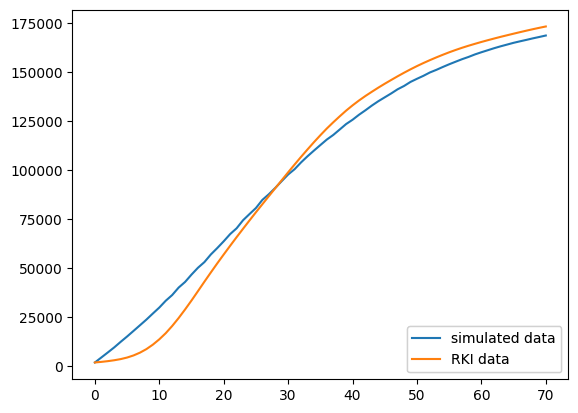

In [36]:
#print(np.array([0.01,0.75,10000]).reshape((1,3)))

observation=simulator2(torch.mean(theta_p,axis=0))
#observation1=simulator2(np.array([1.5,0.75]))
#print(len(np.asarray(casedata.data['cases_all_germany_ma7'].Confirmed)[13:90]))
#print(observation.shape)
#observation1=data_pyross[10:87].flatten()
#print(observation1.shape)
#plt.plot(observation[0::4])
#plt.plot(observation1[0::4])
fig,ax=plt.subplots()

line1,=ax.plot(observation,label="simulated data")
line2,=ax.plot(casedata.data['cases_all_germany_ma7'].Confirmed[0:71],label="RKI data")
first_legend = ax.legend(handles=[line1,line2], loc='lower right')
#ax.legend(handles=[line2], loc='upper right')
ax.add_artist(first_legend)
plt.show()
theta_p_data=pd.DataFrame(theta_p)

theta_p_data.to_csv("output.csv",sep=",")
#plt.plot(observation)
#plt.plot(observation1)
#plt.plot(casedata.data['cases_all_germany_ma7'].Confirmed[:30])

In [20]:
len(casedata.data['cases_all_germany_ma7'].Confirmed)

92

In [12]:
from IPython.display import Image
Image(filename='pairplot_71_100000_no_MSE_joblib.png') 